In [3]:
pip install kornia


  Using cached kornia-0.6.11-py2.py3-none-any.whl (628 kB)


In [1]:
import torchvision
from torchvision import transforms
import torchvision.utils as vutils
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import os
import scipy.io as scio
import kornia
from kornia.geometry.transform.imgwarp import get_perspective_transform

from DIDFuse import AE_Encoder,AE_Decoder 

AE_Encoder(
  (cov1): Cov1(
    (cov1): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): PReLU(num_parameters=1)
    )
  )
  (cov2): Cov2(
    (cov2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=1)
    )
  )
  (cov3): Cov3(
    (cov3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Tanh()
    )
  )
  (cov4): Cov4(
    (cov4): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Tan

Epoch/step: 17/7, loss: -0.0113843, lr: 0.001000
Epoch/step: 17/8, loss: -0.0114793, lr: 0.001000
Epoch/step: 18/1, loss: 0.0308912, lr: 0.001000
Epoch/step: 18/2, loss: -0.0666850, lr: 0.001000
Epoch/step: 18/3, loss: -0.0267258, lr: 0.001000
Epoch/step: 18/4, loss: 0.0133157, lr: 0.001000
Epoch/step: 18/5, loss: 0.0112268, lr: 0.001000
Epoch/step: 18/6, loss: 0.0264609, lr: 0.001000
Epoch/step: 18/7, loss: -0.0169819, lr: 0.001000
Epoch/step: 18/8, loss: -0.0202554, lr: 0.001000
Epoch/step: 19/1, loss: 0.0191498, lr: 0.001000
Epoch/step: 19/2, loss: -0.0703061, lr: 0.001000
Epoch/step: 19/3, loss: -0.0321076, lr: 0.001000
Epoch/step: 19/4, loss: 0.0078812, lr: 0.001000
Epoch/step: 19/5, loss: -0.0007549, lr: 0.001000
Epoch/step: 19/6, loss: 0.0148414, lr: 0.001000
Epoch/step: 19/7, loss: -0.0230386, lr: 0.001000
Epoch/step: 19/8, loss: -0.0277690, lr: 0.001000
Epoch/step: 20/1, loss: 0.0108800, lr: 0.001000
Epoch/step: 20/2, loss: -0.0798078, lr: 0.001000
Epoch/step: 20/3, loss: -0.0

Epoch/step: 38/7, loss: -0.1284162, lr: 0.001000
Epoch/step: 38/8, loss: -0.1510173, lr: 0.001000
Epoch/step: 39/1, loss: -0.1212637, lr: 0.001000
Epoch/step: 39/2, loss: -0.1870112, lr: 0.001000
Epoch/step: 39/3, loss: -0.1408112, lr: 0.001000
Epoch/step: 39/4, loss: -0.1030305, lr: 0.001000
Epoch/step: 39/5, loss: -0.1245781, lr: 0.001000
Epoch/step: 39/6, loss: -0.1290703, lr: 0.001000
Epoch/step: 39/7, loss: -0.1339094, lr: 0.001000
Epoch/step: 39/8, loss: -0.1587143, lr: 0.001000
Epoch/step: 40/1, loss: -0.1284921, lr: 0.001000
Epoch/step: 40/2, loss: -0.1937274, lr: 0.001000
Epoch/step: 40/3, loss: -0.1507383, lr: 0.001000
Epoch/step: 40/4, loss: -0.1095761, lr: 0.001000
Epoch/step: 40/5, loss: -0.1276728, lr: 0.001000
Epoch/step: 40/6, loss: -0.1322436, lr: 0.001000
Epoch/step: 40/7, loss: -0.1404887, lr: 0.001000
Epoch/step: 40/8, loss: -0.1658583, lr: 0.001000
Epoch/step: 41/1, loss: -0.1375017, lr: 0.000100
Epoch/step: 41/2, loss: -0.2042084, lr: 0.000100
Epoch/step: 41/3, lo

Epoch/step: 59/7, loss: -0.1642163, lr: 0.000100
Epoch/step: 59/8, loss: -0.1929496, lr: 0.000100
Epoch/step: 60/1, loss: -0.1582377, lr: 0.000100
Epoch/step: 60/2, loss: -0.2209789, lr: 0.000100
Epoch/step: 60/3, loss: -0.1727602, lr: 0.000100
Epoch/step: 60/4, loss: -0.1326883, lr: 0.000100
Epoch/step: 60/5, loss: -0.1517643, lr: 0.000100
Epoch/step: 60/6, loss: -0.1638632, lr: 0.000100
Epoch/step: 60/7, loss: -0.1647274, lr: 0.000100
Epoch/step: 60/8, loss: -0.1941862, lr: 0.000100
Epoch/step: 61/1, loss: -0.1592355, lr: 0.000100
Epoch/step: 61/2, loss: -0.2216619, lr: 0.000100
Epoch/step: 61/3, loss: -0.1738444, lr: 0.000100
Epoch/step: 61/4, loss: -0.1339962, lr: 0.000100
Epoch/step: 61/5, loss: -0.1519001, lr: 0.000100
Epoch/step: 61/6, loss: -0.1642857, lr: 0.000100
Epoch/step: 61/7, loss: -0.1656234, lr: 0.000100
Epoch/step: 61/8, loss: -0.1944701, lr: 0.000100
Epoch/step: 62/1, loss: -0.1598529, lr: 0.000100
Epoch/step: 62/2, loss: -0.2221621, lr: 0.000100
Epoch/step: 62/3, lo

Epoch/step: 80/7, loss: -0.1786309, lr: 0.000100
Epoch/step: 80/8, loss: -0.2068203, lr: 0.000100
Epoch/step: 81/1, loss: -0.1747590, lr: 0.000010
Epoch/step: 81/2, loss: -0.2339705, lr: 0.000010
Epoch/step: 81/3, loss: -0.1861035, lr: 0.000010
Epoch/step: 81/4, loss: -0.1460944, lr: 0.000010
Epoch/step: 81/5, loss: -0.1631758, lr: 0.000010
Epoch/step: 81/6, loss: -0.1766083, lr: 0.000010
Epoch/step: 81/7, loss: -0.1787809, lr: 0.000010
Epoch/step: 81/8, loss: -0.2089554, lr: 0.000010
Epoch/step: 82/1, loss: -0.1751477, lr: 0.000010
Epoch/step: 82/2, loss: -0.2339189, lr: 0.000010
Epoch/step: 82/3, loss: -0.1857969, lr: 0.000010
Epoch/step: 82/4, loss: -0.1458080, lr: 0.000010
Epoch/step: 82/5, loss: -0.1634300, lr: 0.000010
Epoch/step: 82/6, loss: -0.1767380, lr: 0.000010
Epoch/step: 82/7, loss: -0.1787363, lr: 0.000010
Epoch/step: 82/8, loss: -0.2093697, lr: 0.000010
Epoch/step: 83/1, loss: -0.1753641, lr: 0.000010
Epoch/step: 83/2, loss: -0.2339326, lr: 0.000010
Epoch/step: 83/3, lo

Epoch/step: 101/6, loss: -0.1778774, lr: 0.000010
Epoch/step: 101/7, loss: -0.1801185, lr: 0.000010
Epoch/step: 101/8, loss: -0.2107155, lr: 0.000010
Epoch/step: 102/1, loss: -0.1767098, lr: 0.000010
Epoch/step: 102/2, loss: -0.2351425, lr: 0.000010
Epoch/step: 102/3, loss: -0.1866847, lr: 0.000010
Epoch/step: 102/4, loss: -0.1467480, lr: 0.000010
Epoch/step: 102/5, loss: -0.1644525, lr: 0.000010
Epoch/step: 102/6, loss: -0.1779402, lr: 0.000010
Epoch/step: 102/7, loss: -0.1801811, lr: 0.000010
Epoch/step: 102/8, loss: -0.2108021, lr: 0.000010
Epoch/step: 103/1, loss: -0.1767920, lr: 0.000010
Epoch/step: 103/2, loss: -0.2351964, lr: 0.000010
Epoch/step: 103/3, loss: -0.1867270, lr: 0.000010
Epoch/step: 103/4, loss: -0.1467960, lr: 0.000010
Epoch/step: 103/5, loss: -0.1645074, lr: 0.000010
Epoch/step: 103/6, loss: -0.1779985, lr: 0.000010
Epoch/step: 103/7, loss: -0.1802465, lr: 0.000010
Epoch/step: 103/8, loss: -0.2108677, lr: 0.000010
Epoch/step: 104/1, loss: -0.1768724, lr: 0.000010


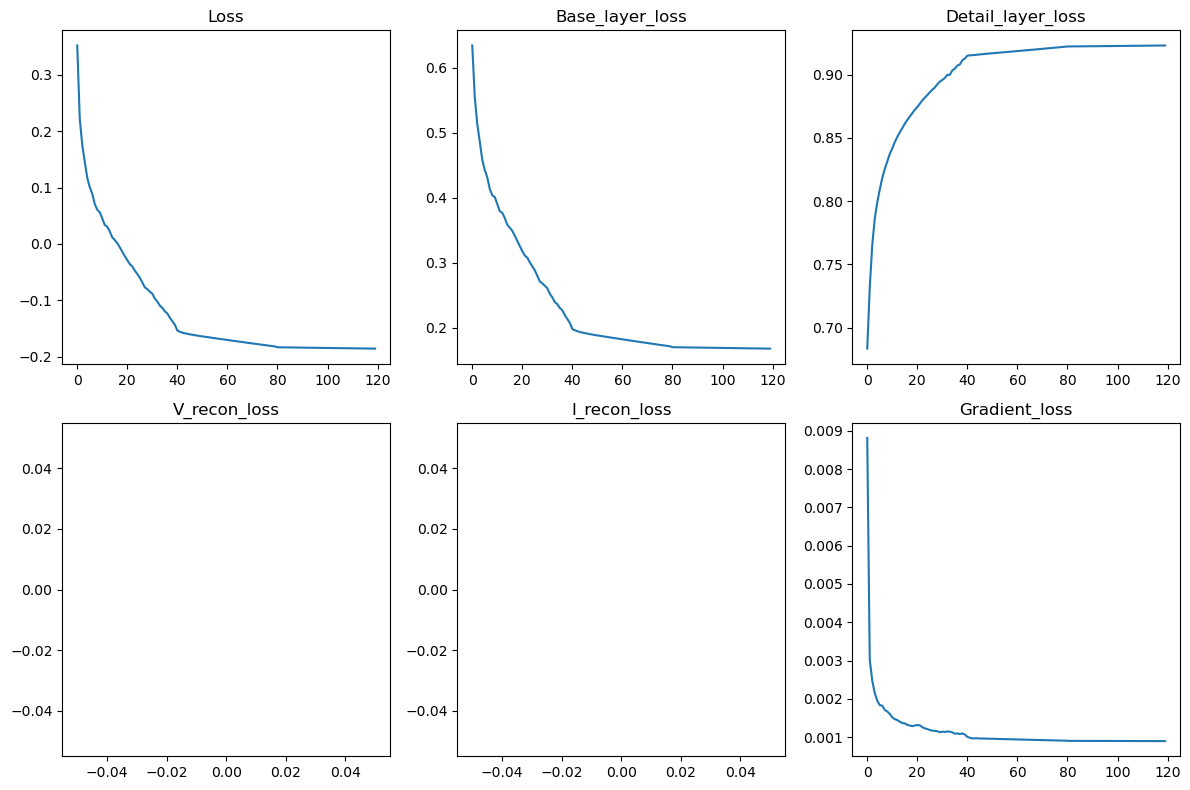

In [2]:
# =============================================================================
# Hyperparameters Setting 
# =============================================================================
Train_data_choose='FLIR'#'FLIR' & 'NIR'
if Train_data_choose=='FLIR':
    train_data_path = '.\\Datasets\\Train_data_FLIR\\'

root_VIS = train_data_path+'VIS\\'
root_IR = train_data_path+'\\IR\\'
train_path = '.\\Train_result_1\\'
#device = "cuda"

batch_size=24
channel=64
epochs = 120
lr = 1e-3

Train_Image_Number=len(os.listdir(train_data_path+'IR\\IR'))

Iter_per_epoch=(Train_Image_Number % batch_size!=0)+Train_Image_Number//batch_size
# =============================================================================
# Preprocessing and dataset establishment 
# =============================================================================

transforms = transforms.Compose([
        transforms.CenterCrop(128),
        transforms.Grayscale(1),
        transforms.ToTensor(),
        ])

                                   
Data_VIS = torchvision.datasets.ImageFolder(root_VIS,transform=transforms)
dataloader_VIS = torch.utils.data.DataLoader(Data_VIS, batch_size,shuffle=False)

Data_IR = torchvision.datasets.ImageFolder(root_IR,transform=transforms)
dataloader_IR = torch.utils.data.DataLoader(Data_IR, batch_size,shuffle=False)

# =============================================================================
# Models
# =============================================================================
AE_Encoder=AE_Encoder()
AE_Decoder=AE_Decoder()
'''is_cuda = True
if is_cuda:
    AE_Encoder=AE_Encoder.cuda()
    AE_Decoder=AE_Decoder.cuda()'''
 
 
print(AE_Encoder)
print(AE_Decoder)


optimizer1 = optim.Adam(AE_Encoder.parameters(), lr = lr)
optimizer2 = optim.Adam(AE_Decoder.parameters(), lr = lr)


scheduler1 = torch.optim.lr_scheduler.MultiStepLR(optimizer1, [epochs//3,epochs//3*2], gamma=0.1)
scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimizer2, [epochs//3,epochs//3*2], gamma=0.1)


MSELoss = nn.MSELoss()
SmoothL1Loss=nn.SmoothL1Loss()
L1Loss=nn.L1Loss()
#ssim = kornia.losses.ms_ssim(11, reduction='mean')
#loss.backward()
# =============================================================================
# Training
# =============================================================================
print('============ Training Begins ===============')
loss_train=[]
mse_loss_B_train=[]
mse_loss_D_train=[]
mse_loss_VF_train=[]
mse_loss_IF_train=[]
Gradient_loss_train=[]
lr_list1=[]
lr_list2=[]
alpha_list=[]
for iteration in range(epochs):
    
    AE_Encoder.train()
    AE_Decoder.train()
    
   
    data_iter_VIS = iter(dataloader_VIS)
    data_iter_IR = iter(dataloader_IR)
    
    for step in range(Iter_per_epoch):
        data_VIS,_ =next(data_iter_VIS)
        data_IR,_  =next(data_iter_IR)
        
          
        '''if is_cuda:
            data_VIS=data_VIS.cuda()
            data_IR=data_IR.cuda()'''
        
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        # =====================================================================
        # Calculate loss 
        # =====================================================================
        feature_V_1,feature_V_2,feature_V_B, feature_V_D = AE_Encoder(data_VIS)
        feature_I_1,feature_I_2,feature_I_B, feature_I_D = AE_Encoder(data_IR)
        img_recon_V=AE_Decoder(feature_V_1,feature_V_2,feature_V_B, feature_V_D)
        img_recon_I=AE_Decoder(feature_I_1,feature_I_2,feature_I_B, feature_I_D)

        mse_loss_B  = L1Loss(feature_I_B, feature_V_B)
        mse_loss_D  = L1Loss(feature_I_D, feature_V_D)

        #mse_loss_VF = 5*ssim(data_VIS, img_recon_V)+MSELoss(data_VIS, img_recon_V)
        #mse_loss_IF = 5*ssim(data_IR,  img_recon_I)+MSELoss(data_IR,  img_recon_I)

        Gradient_loss = L1Loss(
                kornia.filters.SpatialGradient()(data_VIS),
                kornia.filters.SpatialGradient()(img_recon_V)
                )
        #Total loss
        loss = torch.tanh(mse_loss_B) - 0.5*torch.tanh(mse_loss_D) + 10*Gradient_loss
        #loss = 2*mse_loss_VF + 2*mse_loss_IF +  torch.tanh(mse_loss_B) - 0.5*torch.tanh(mse_loss_D) + 10*Gradient_loss
   
        loss.backward()
        optimizer1.step()
        optimizer2.step()
        
        los = loss.item()
        los_B = mse_loss_B.item()
        los_D = mse_loss_D.item()
        #los_VF = mse_loss_VF.item()
        #los_IF = mse_loss_IF.item()
        los_G = Gradient_loss.item()
        
        print('Epoch/step: %d/%d, loss: %.7f, lr: %f' %(iteration+1, step+1, los, optimizer1.state_dict()['param_groups'][0]['lr']))

        #Save Loss
        loss_train.append(loss.item())
        mse_loss_B_train.append(mse_loss_B.item())
        mse_loss_D_train.append(mse_loss_D.item())
        #mse_loss_VF_train.append(mse_loss_VF.item())
        #mse_loss_IF_train.append(mse_loss_IF.item())
        Gradient_loss_train.append(Gradient_loss.item())
    scheduler1.step()
    scheduler2.step()
    lr_list1.append(optimizer1.state_dict()['param_groups'][0]['lr'])
    lr_list2.append(optimizer2.state_dict()['param_groups'][0]['lr'])


# Save Weights and result
torch.save( {'weight': AE_Encoder.state_dict(), 'epoch':epochs}, 
   os.path.join(train_path,'Encoder_weight.pkl'))
torch.save( {'weight': AE_Decoder.state_dict(), 'epoch':epochs}, 
   os.path.join(train_path,'Decoder_weight.pkl'))

scio.savemat(os.path.join(train_path, 'TrainData.mat'), 
                         {'Loss': np.array(loss_train),
                          'Base_layer_loss'  : np.array(mse_loss_B_train),
                          'Detail_layer_loss': np.array(mse_loss_D_train),
                          'V_recon_loss': np.array(mse_loss_VF_train),
                          'I_recon_loss': np.array(mse_loss_IF_train),
                          'Gradient_loss': np.array(Gradient_loss_train),
                          })
scio.savemat(os.path.join(train_path, 'TrainData_plot_loss.mat'), 
                         {'loss_train': np.array(loss_train),
                          'mse_loss_B_train'  : np.array(mse_loss_B_train),
                          'mse_loss_D_train': np.array(mse_loss_D_train),
                          #'mse_loss_VF_train': np.array(mse_loss_VF_train),
                          #'mse_loss_IF_train': np.array(mse_loss_IF_train),
                          'Gradient_loss_train': np.array(Gradient_loss_train),
                          })
# plot
def Average_loss(loss):
    return [sum(loss[i*Iter_per_epoch:(i+1)*Iter_per_epoch])/Iter_per_epoch for i in range(int(len(loss)/Iter_per_epoch))]

plt.figure(figsize=[12,8])
plt.subplot(2,3,1), plt.plot(Average_loss(loss_train)), plt.title('Loss')
plt.subplot(2,3,2), plt.plot(Average_loss(mse_loss_B_train)), plt.title('Base_layer_loss')
plt.subplot(2,3,3), plt.plot(Average_loss(mse_loss_D_train)), plt.title('Detail_layer_loss')
plt.subplot(2,3,4), plt.plot(Average_loss(mse_loss_VF_train)), plt.title('V_recon_loss')
plt.subplot(2,3,5), plt.plot(Average_loss(mse_loss_IF_train)), plt.title('I_recon_loss')
plt.subplot(2,3,6), plt.plot(Average_loss(Gradient_loss_train)), plt.title('Gradient_loss')
plt.tight_layout()
plt.savefig(os.path.join(train_path,'curve_per_epoch.png'))   